## Housing Case Study

Problem Statement:

Consider a real estate company that has a dataset containing the prices of properties in the Delhi region. It wishes to use the data to optimise the sale prices of the properties based on important factors such as area, bedrooms, parking, etc.

Essentially, the company wants —


- To identify the variables affecting house prices, e.g. area, number of rooms, bathrooms, etc.

- To create a linear model that quantitatively relates house prices with variables such as number of rooms, area, number of bathrooms, etc.

- To know the accuracy of the model, i.e. how well these variables can predict house prices.

### Importing and Understanding Data

In [2]:
import pandas as pd
import numpy as np

In [3]:
# Importing Housing.csv
import os
os.chdir("C:\\Users\\Jomin\\Machine Learning\\Linear Regression\\Housing_DataSet")
housing = pd.read_csv('Housing.csv')

In [4]:
# Looking at the first five rows
housing.head()

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,13300000,7420,4,2,3,yes,no,no,no,yes,2,yes,furnished
1,12250000,8960,4,4,4,yes,no,no,no,yes,3,no,furnished
2,12250000,9960,3,2,2,yes,no,yes,no,no,2,yes,semi-furnished
3,12215000,7500,4,2,2,yes,no,yes,no,yes,3,yes,furnished
4,11410000,7420,4,1,2,yes,yes,yes,no,yes,2,no,furnished


In [5]:
# What type of values are stored in the columns?
housing.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 545 entries, 0 to 544
Data columns (total 13 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   price             545 non-null    int64 
 1   area              545 non-null    int64 
 2   bedrooms          545 non-null    int64 
 3   bathrooms         545 non-null    int64 
 4   stories           545 non-null    int64 
 5   mainroad          545 non-null    object
 6   guestroom         545 non-null    object
 7   basement          545 non-null    object
 8   hotwaterheating   545 non-null    object
 9   airconditioning   545 non-null    object
 10  parking           545 non-null    int64 
 11  prefarea          545 non-null    object
 12  furnishingstatus  545 non-null    object
dtypes: int64(6), object(7)
memory usage: 55.5+ KB


### Data Preparation

- You can see that your dataset has many columns with values as 'Yes' or 'No'.

- We need to convert them to 1s and 0s, where 1 is a 'Yes' and 0 is a 'No'.

In [6]:
# Converting Yes to 1 and No to 0
housing['mainroad'] = housing['mainroad'].map({'yes': 1, 'no': 0})
housing['guestroom'] = housing['guestroom'].map({'yes': 1, 'no': 0})
housing['basement'] = housing['basement'].map({'yes': 1, 'no': 0})
housing['hotwaterheating'] = housing['hotwaterheating'].map({'yes': 1, 'no': 0})
housing['airconditioning'] = housing['airconditioning'].map({'yes': 1, 'no': 0})
housing['prefarea'] = housing['prefarea'].map({'yes': 1, 'no': 0})

In [7]:
# Now let's see the head
housing.head()

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,13300000,7420,4,2,3,1,0,0,0,1,2,1,furnished
1,12250000,8960,4,4,4,1,0,0,0,1,3,0,furnished
2,12250000,9960,3,2,2,1,0,1,0,0,2,1,semi-furnished
3,12215000,7500,4,2,2,1,0,1,0,1,3,1,furnished
4,11410000,7420,4,1,2,1,1,1,0,1,2,0,furnished


The variable 'furnishingstatus' had three levels. We need to convert it to integer.

In [8]:
# Creating a dummy variable for 'furnishingstatus'
status = pd.get_dummies(housing['furnishingstatus'])

In [9]:
# The result has created three variables that are not needed.
status.head()

,furnished,semi-furnished,unfurnished
0,1,0,0
1,1,0,0
2,0,1,0
3,1,0,0
4,1,0,0


In [10]:
# we don't need 3 columns.
# we can use drop_first = True to drop the first column from status df.
status = pd.get_dummies(housing['furnishingstatus'],drop_first=True)

In [11]:
#Adding the results to the master dataframe
housing = pd.concat([housing,status],axis=1)

In [12]:
# Now let's see the head of our dataframe.
housing.head()

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus,semi-furnished,unfurnished
0,13300000,7420,4,2,3,1,0,0,0,1,2,1,furnished,0,0
1,12250000,8960,4,4,4,1,0,0,0,1,3,0,furnished,0,0
2,12250000,9960,3,2,2,1,0,1,0,0,2,1,semi-furnished,1,0
3,12215000,7500,4,2,2,1,0,1,0,1,3,1,furnished,0,0
4,11410000,7420,4,1,2,1,1,1,0,1,2,0,furnished,0,0


In [13]:
# Dropping furnishingstatus as we have created the dummies for it
housing.drop(['furnishingstatus'],axis=1,inplace=True)

In [14]:
# Now let's see the head of our dataframe.
housing.head()

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,semi-furnished,unfurnished
0,13300000,7420,4,2,3,1,0,0,0,1,2,1,0,0
1,12250000,8960,4,4,4,1,0,0,0,1,3,0,0,0
2,12250000,9960,3,2,2,1,0,1,0,0,2,1,1,0
3,12215000,7500,4,2,2,1,0,1,0,1,3,1,0,0
4,11410000,7420,4,1,2,1,1,1,0,1,2,0,0,0


#### Creating a new variable

In [15]:
# Let us create the new metric and assign it to "areaperbedroom"
housing['areaperbedroom'] = housing['area']/housing['bedrooms']

In [16]:
# Metric:bathrooms per bedroom
housing['bbratio'] = housing['bathrooms']/housing['bedrooms']

In [17]:
housing.head()

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,semi-furnished,unfurnished,areaperbedroom,bbratio
0,13300000,7420,4,2,3,1,0,0,0,1,2,1,0,0,1855.0,0.500000
1,12250000,8960,4,4,4,1,0,0,0,1,3,0,0,0,2240.0,1.000000
2,12250000,9960,3,2,2,1,0,1,0,0,2,1,1,0,3320.0,0.666667
3,12215000,7500,4,2,2,1,0,1,0,1,3,1,0,0,1875.0,0.500000
4,11410000,7420,4,1,2,1,1,1,0,1,2,0,0,0,1855.0,0.250000


### Rescaling the Features 
It is extremely important to rescale the variables so that they have a comparable scale. 
There are twocoon ways of rescaling 
1. Normalisation (min-max scaling) and 
2. standardisation (mean-o, sigma-1) 
Let's try normalisation

In [18]:
#defining a normalisation function 
def normalize (x): 
    return ( (x-np.mean(x))/ (max(x) - min(x)))
                                            
                                              
# applying normalize ( ) to all columns 
housing = housing.apply(normalize) 

In [19]:
housing.head()

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,semi-furnished,unfurnished,areaperbedroom,bbratio
0,0.738811,0.155977,0.206972,0.237920,0.398165,0.141284,-0.177982,-0.350459,-0.045872,0.684404,0.435474,0.765138,-0.416514,-0.326606,0.005652,0.064367
1,0.647902,0.261818,0.206972,0.904587,0.731498,0.141284,-0.177982,-0.350459,-0.045872,0.684404,0.768807,-0.234862,-0.416514,-0.326606,0.067559,0.664367
2,0.647902,0.330547,0.006972,0.237920,0.064832,0.141284,-0.177982,0.649541,-0.045872,-0.315596,0.435474,0.765138,0.583486,-0.326606,0.241220,0.264367
3,0.644872,0.161475,0.206972,0.237920,0.064832,0.141284,-0.177982,0.649541,-0.045872,0.684404,0.768807,0.765138,-0.416514,-0.326606,0.008868,0.064367
4,0.575175,0.155977,0.206972,-0.095413,0.064832,0.141284,0.822018,0.649541,-0.045872,0.684404,0.435474,-0.234862,-0.416514,-0.326606,0.005652,-0.235633


## Splitting Data into Training and Testing Sets

In [20]:
housing.columns

Index(['price', 'area', 'bedrooms', 'bathrooms', 'stories', 'mainroad',
       'guestroom', 'basement', 'hotwaterheating', 'airconditioning',
       'parking', 'prefarea', 'semi-furnished', 'unfurnished',
       'areaperbedroom', 'bbratio'],
      dtype='object')

In [21]:
# Putting feature variable to X
X = housing[['area', 'bedrooms', 'bathrooms', 'stories', 'mainroad',
       'guestroom', 'basement', 'hotwaterheating', 'airconditioning',
       'parking', 'prefarea', 'semi-furnished', 'unfurnished',
       'areaperbedroom', 'bbratio']]

# Putting response variable to y
y = housing['price']

In [22]:
#random_state is the seed used by the random number generator, it can be any integer.
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.7 ,test_size = 0.3, random_state=0)

In [23]:
X_train.head()

,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,semi-furnished,unfurnished,areaperbedroom,bbratio
454,-0.044711,0.006972,-0.095413,0.064832,0.141284,-0.177982,-0.350459,-0.045872,0.684404,-0.231193,-0.234862,-0.416514,0.673394,-0.051432,-0.135633
392,-0.079762,0.006972,-0.095413,0.064832,0.141284,-0.177982,-0.350459,-0.045872,-0.315596,-0.231193,-0.234862,0.583486,-0.326606,-0.078767,-0.135633
231,-0.057082,0.006972,-0.095413,-0.268502,0.141284,-0.177982,-0.350459,-0.045872,-0.315596,-0.231193,0.765138,0.583486,-0.326606,-0.061079,-0.135633
271,-0.223061,0.406972,-0.095413,0.064832,-0.858716,-0.177982,0.649541,-0.045872,-0.315596,-0.231193,-0.234862,0.583486,-0.326606,-0.231364,-0.295633
250,-0.112752,0.006972,-0.095413,0.398165,0.141284,-0.177982,-0.350459,-0.045872,-0.315596,-0.231193,-0.234862,0.583486,-0.326606,-0.104495,-0.135633


In [24]:
y_train.head()

454   -0.140583
392   -0.109674
231   -0.006643
271   -0.036946
250   -0.021795
Name: price, dtype: float64

## Building a linear model

In [25]:
import statsmodels.api as sm          # Importing statsmodels
X_train = sm.add_constant(X_train)    # Adding a constant column to our dataframe
# create a first fitted model
lm_1 = sm.OLS(y_train,X_train).fit()

C:\Users\Jomin\anaconda3\lib\site-packages\statsmodels\tsa\tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


In [26]:
#Let's see the summary of our first linear model
print(lm_1.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.662
Model:                            OLS   Adj. R-squared:                  0.648
Method:                 Least Squares   F-statistic:                     47.57
Date:                Tue, 19 Apr 2022   Prob (F-statistic):           2.83e-76
Time:                        16:52:15   Log-Likelihood:                 359.20
No. Observations:                 381   AIC:                            -686.4
Df Residuals:                     365   BIC:                            -623.3
Df Model:                          15                                         
Covariance Type:            nonrobust                                         
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
const               0.0006      0.005     

### Checking VIF

In [26]:
# UDF for calculating vif value
def vif_cal(input_data, dependent_col):
    vif_df = pd.DataFrame( columns = ['Var', 'Vif'])
    x_vars=input_data.drop([dependent_col], axis=1)
    xvar_names=x_vars.columns
    for i in range(0,xvar_names.shape[0]):
        y=x_vars[xvar_names[i]] 
        x=x_vars[xvar_names.drop(xvar_names[i])]
        rsq=sm.OLS(y,x).fit().rsquared  
        vif=round(1/(1-rsq),2)
        vif_df.loc[i] = [xvar_names[i], vif]
    return vif_df.sort_values(by = 'Vif', axis=0, ascending=False, inplace=False)

In [27]:
# Calculating Vif value
vif_cal(input_data=housing, dependent_col="price")

,Var,Vif
2,bathrooms,20.21
14,bbratio,19.04
13,areaperbedroom,17.59
0,area,16.00
1,bedrooms,9.11
12,unfurnished,1.68
11,semi-furnished,1.59
3,stories,1.51
6,basement,1.33
5,guestroom,1.23


## Correlation matrix

In [28]:
# Importing matplotlib and seaborn
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

<AxesSubplot:>

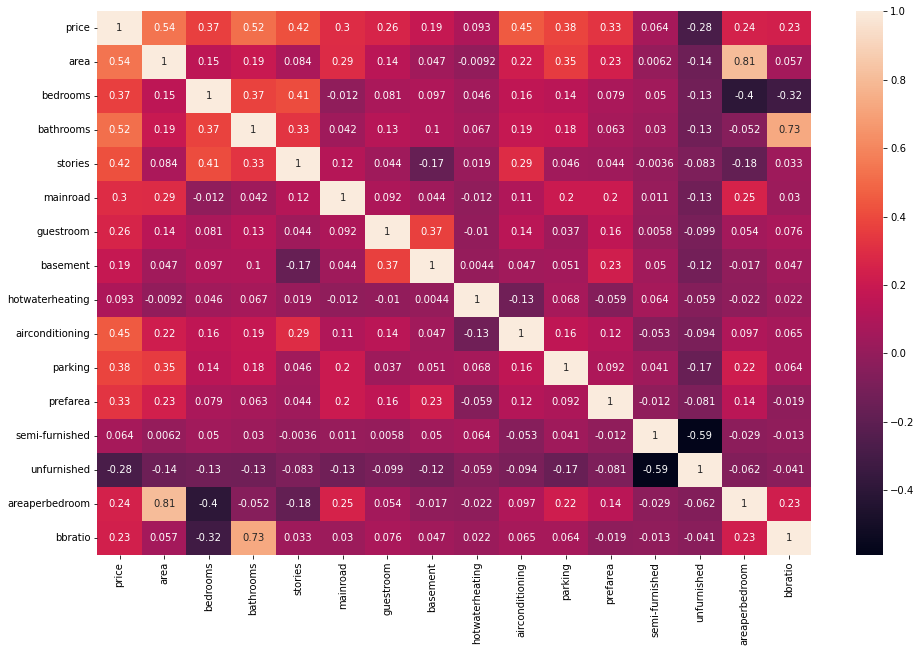

In [29]:
# Let's see the correlation matrix 
plt.figure(figsize = (16,10))     # Size of the figure
sns.heatmap(housing.corr(),annot = True)

### Dropping the Variable and Updating the Model

In [30]:
# Dropping highly correlated variables and insignificant variables
X_train = X_train.drop('bbratio', 1)

C:\Users\Jomin\AppData\Local\Temp/ipykernel_22900/3461574453.py:2: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
  X_train = X_train.drop('bbratio', 1)


In [31]:
# Create a second fitted model
lm_2 = sm.OLS(y_train,X_train).fit()

In [32]:
#Let's see the summary of our second linear model
print(lm_2.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.661
Model:                            OLS   Adj. R-squared:                  0.648
Method:                 Least Squares   F-statistic:                     50.95
Date:                Tue, 29 Mar 2022   Prob (F-statistic):           5.62e-77
Time:                        10:13:09   Log-Likelihood:                 358.81
No. Observations:                 381   AIC:                            -687.6
Df Residuals:                     366   BIC:                            -628.5
Df Model:                          14                                         
Covariance Type:            nonrobust                                         
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
const               0.0007      0.005     

### Dropping the Variable and Updating the Model

In [33]:
# Calculating Vif value
vif_cal(input_data=housing.drop(["bbratio"], axis=1), dependent_col="price")

,Var,Vif
13,areaperbedroom,14.14
0,area,12.84
1,bedrooms,4.99
12,unfurnished,1.68
11,semi-furnished,1.59
3,stories,1.50
6,basement,1.32
2,bathrooms,1.29
5,guestroom,1.22
9,parking,1.22


In [34]:
# Dropping highly correlated variables and insignificant variables
X_train = X_train.drop('bedrooms', 1)

C:\Users\Jomin\AppData\Local\Temp/ipykernel_22900/399189762.py:2: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
  X_train = X_train.drop('bedrooms', 1)


In [35]:
# Create a third fitted model
lm_3 = sm.OLS(y_train,X_train).fit()

In [36]:
#Let's see the summary of our third linear model
print(lm_3.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.661
Model:                            OLS   Adj. R-squared:                  0.649
Method:                 Least Squares   F-statistic:                     54.96
Date:                Tue, 29 Mar 2022   Prob (F-statistic):           8.42e-78
Time:                        10:13:10   Log-Likelihood:                 358.67
No. Observations:                 381   AIC:                            -689.3
Df Residuals:                     367   BIC:                            -634.1
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
const               0.0006      0.005     

In [37]:
# Calculating Vif value
vif_cal(input_data=housing.drop(["bedrooms","bbratio"], axis=1), dependent_col="price")

,Var,Vif
0,area,4.21
12,areaperbedroom,3.88
11,unfurnished,1.67
10,semi-furnished,1.58
2,stories,1.49
5,basement,1.32
1,bathrooms,1.29
8,parking,1.22
4,guestroom,1.21
7,airconditioning,1.21


### Dropping the Variable and Updating the Model

In [38]:
# # Dropping highly correlated variables and insignificant variables
X_train = X_train.drop('areaperbedroom', 1)

C:\Users\Jomin\AppData\Local\Temp/ipykernel_22900/668759977.py:2: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
  X_train = X_train.drop('areaperbedroom', 1)


In [39]:
# Create a fourth fitted model
lm_4 = sm.OLS(y_train,X_train).fit()

In [40]:
#Let's see the summary of our fourth linear model
print(lm_4.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.658
Model:                            OLS   Adj. R-squared:                  0.646
Method:                 Least Squares   F-statistic:                     58.87
Date:                Tue, 29 Mar 2022   Prob (F-statistic):           5.65e-78
Time:                        10:13:10   Log-Likelihood:                 356.92
No. Observations:                 381   AIC:                            -687.8
Df Residuals:                     368   BIC:                            -636.6
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
const               0.0002      0.005     

In [41]:
# Calculating Vif value
vif_cal(input_data=housing.drop(["bedrooms","bbratio","areaperbedroom"], axis=1), dependent_col="price")

,Var,Vif
11,unfurnished,1.67
10,semi-furnished,1.58
0,area,1.32
2,stories,1.30
5,basement,1.30
1,bathrooms,1.22
4,guestroom,1.21
7,airconditioning,1.21
8,parking,1.21
3,mainroad,1.16


### Dropping the Variable and Updating the Model

In [42]:
# # Dropping highly correlated variables and insignificant variables
X_train = X_train.drop('semi-furnished', 1)

C:\Users\Jomin\AppData\Local\Temp/ipykernel_22900/4116383123.py:2: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
  X_train = X_train.drop('semi-furnished', 1)


In [43]:
# Create a fifth fitted model
lm_5 = sm.OLS(y_train,X_train).fit()

In [44]:
#Let's see the summary of our fifth linear model
print(lm_5.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.657
Model:                            OLS   Adj. R-squared:                  0.647
Method:                 Least Squares   F-statistic:                     64.34
Date:                Tue, 29 Mar 2022   Prob (F-statistic):           7.60e-79
Time:                        10:13:10   Log-Likelihood:                 356.82
No. Observations:                 381   AIC:                            -689.6
Df Residuals:                     369   BIC:                            -642.3
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
const               0.0002      0.005     

In [45]:
# Calculating Vif value
vif_cal(input_data=housing.drop(["bedrooms","bbratio","areaperbedroom","semi-furnished"], axis=1), dependent_col="price")

,Var,Vif
0,area,1.32
2,stories,1.30
5,basement,1.30
1,bathrooms,1.22
4,guestroom,1.21
8,parking,1.21
7,airconditioning,1.20
3,mainroad,1.15
9,prefarea,1.15
10,unfurnished,1.07


### Dropping the Variable and Updating the Model

In [46]:
# # Dropping highly correlated variables and insignificant variables
X_train = X_train.drop('basement', 1)

C:\Users\Jomin\AppData\Local\Temp/ipykernel_22900/1104257601.py:2: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
  X_train = X_train.drop('basement', 1)


In [47]:
# Create a sixth fitted model
lm_6 = sm.OLS(y_train,X_train).fit()

In [48]:
#Let's see the summary of our sixth linear model
print(lm_6.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.650
Model:                            OLS   Adj. R-squared:                  0.641
Method:                 Least Squares   F-statistic:                     68.85
Date:                Tue, 29 Mar 2022   Prob (F-statistic):           3.31e-78
Time:                        10:13:10   Log-Likelihood:                 353.04
No. Observations:                 381   AIC:                            -684.1
Df Residuals:                     370   BIC:                            -640.7
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
const              -0.0003      0.005     

In [49]:
# Calculating Vif value
vif_cal(input_data=housing.drop(["bedrooms","bbratio","areaperbedroom","semi-furnished","basement"], axis=1), dependent_col="price")

,Var,Vif
0,area,1.31
2,stories,1.22
7,parking,1.21
1,bathrooms,1.20
6,airconditioning,1.20
3,mainroad,1.15
8,prefarea,1.10
4,guestroom,1.07
9,unfurnished,1.06
5,hotwaterheating,1.04


#### Assessment  question
#### Design four models by dropping all the variables one by one with high vif (>5). Then, compare the results.

## Making Predictions Using the Final Model

### Prediction with Model 6

In [50]:
# Adding  constant variable to test dataframe
X_test_m6 = sm.add_constant(X_test)

C:\Users\Jomin\anaconda3\lib\site-packages\statsmodels\tsa\tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


In [51]:
# Creating X_test_m6 dataframe by dropping variables from X_test_m6
#X_test_m6 = X_test_m6.drop(["bedrooms","bbratio","areaperbedroom","semi-furnished","basement"], axis=1)

In [52]:
# Making predictions
y_pred_m6 = lm_6.predict(X_test_m6)

ValueError: shapes (164,16) and (11,) not aligned: 16 (dim 1) != 11 (dim 0)

In [ ]:
y_pred_m6

## Model Evaluation

NameError: name 'y_pred_m6' is not defined

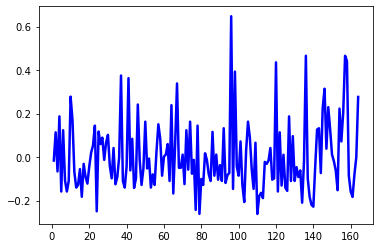

In [53]:
# Actual vs Predicted
c = [i for i in range(1,165,1)]
fig = plt.figure()
plt.plot(c,y_test, color="blue", linewidth=2.5, linestyle="-")     #Plotting Actual
plt.plot(c,y_pred_m6, color="red",  linewidth=2.5, linestyle="-")  #Plotting predicted
fig.suptitle('Actual and Predicted', fontsize=20)              # Plot heading 
plt.xlabel('Index', fontsize=18)                               # X-label
plt.ylabel('Housing Price', fontsize=16)                       # Y-label

In [54]:
# Plotting y_test and y_pred to understand the spread.
fig = plt.figure()
plt.scatter(y_test,y_pred_m6)
fig.suptitle('y_test vs y_pred', fontsize=20)              # Plot heading 
plt.xlabel('y_test', fontsize=18)                          # X-label
plt.ylabel('y_pred', fontsize=16)                          # Y-label

NameError: name 'y_pred_m6' is not defined

<Figure size 432x288 with 0 Axes>

In [55]:
# Error terms
fig = plt.figure()
c = [i for i in range(1,165,1)]
plt.plot(c,y_test-y_pred_m6, color="blue", linewidth=2.5, linestyle="-")
fig.suptitle('Error Terms', fontsize=20)              # Plot heading 
plt.xlabel('Index', fontsize=18)                      # X-label
plt.ylabel('ytest-ypred', fontsize=16)                # Y-label

NameError: name 'y_pred_m6' is not defined

<Figure size 432x288 with 0 Axes>

In [56]:
# Plotting the error terms to understand the distribution.
fig = plt.figure()
sns.distplot((y_test-y_pred_m6),bins=50)
fig.suptitle('Error Terms', fontsize=20)                  # Plot heading 
plt.xlabel('y_test-y_pred', fontsize=18)                  # X-label
plt.ylabel('Index', fontsize=16)                          # Y-label

NameError: name 'y_pred_m6' is not defined

<Figure size 432x288 with 0 Axes>

In [57]:
import numpy as np
from sklearn import metrics
print('RMSE :', np.sqrt(metrics.mean_squared_error(y_test, y_pred_m6)))

NameError: name 'y_pred_m6' is not defined